In [1]:
# Importing Libraries
import pandas as pd
import datetime as dt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)

In [2]:
# Loading the purchase file
data = pd.read_csv('purchases.txt', sep='\t',parse_dates=['2009-11-06'])
data.head()

,760,25,2009-11-06
0,860,50.0,2012-09-28
1,1200,100.0,2005-10-25
2,1420,50.0,2009-07-09
3,1940,70.0,2013-01-25
4,1960,40.0,2013-10-29


In [3]:
# Visualizing number of rows and columns
data.shape

(51242, 3)

In [4]:
# Renaming of names of columns
data = data.rename(columns ={'760':'customers_ID','25':'purchase_amount', '2009-11-06':'date_of_purchase'})

In [5]:
# Data inforation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51242 entries, 0 to 51241
Data columns (total 3 columns):
customers_ID        51242 non-null int64
purchase_amount     51242 non-null float64
date_of_purchase    51242 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [6]:
# Descriptive statistics
data.describe()

,customers_ID,purchase_amount
count,51242.000000,51242.000000
mean,108936.658991,62.337924
std,67649.582382,156.608242
min,10.000000,5.000000
25%,57722.500000,25.000000
50%,102440.000000,30.000000
75%,160527.500000,60.000000
max,264200.000000,4500.000000


In [7]:
# Extracting year
data['year_of_purchase'] = data['date_of_purchase'].dt.year

In [8]:
data.head()

,customers_ID,purchase_amount,date_of_purchase,year_of_purchase
0,860,50.0,2012-09-28,2012
1,1200,100.0,2005-10-25,2005
2,1420,50.0,2009-07-09,2009
3,1940,70.0,2013-01-25,2013
4,1960,40.0,2013-10-29,2013


# Exploration a Dataframe with SQL functions

In [9]:
# Importing library pandassql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [10]:
# Getting value max of purchase amount
print (pysqldf("select max(purchase_amount) from data").head())

   max(purchase_amount)
0                4500.0


In [11]:
# Number of purchases per year
x = pysqldf("select year_of_purchase, count(year_of_purchase) as count from data group by year_of_purchase")
x

,year_of_purchase,count
0,2005,1470
1,2006,2182
2,2007,4674
3,2008,4331
4,2009,5053
5,2010,4939
6,2011,4785
7,2012,5960
8,2013,5912
9,2014,5739


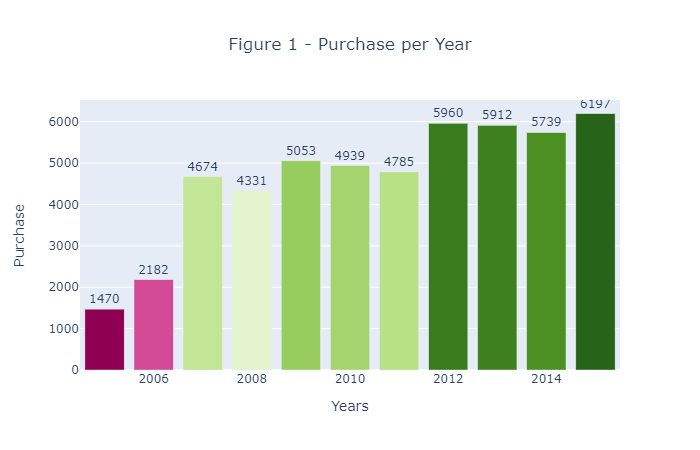

In [12]:
# Plotting Number of purchases per year
value = x['count'].round(0)
label = x.loc[:, 'year_of_purchase'].values
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'PiYG'})
layout = go.Layout(title="Figure 1 - Purchase per Year", 
                   xaxis={'title' : "Years"},
                  yaxis={'title' : "Purchase"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

In [13]:
# Average purchase amount per year
x1 = pysqldf("select year_of_purchase, avg(purchase_amount) as 'avg amount' from data group by year_of_purchase")
x1

,year_of_purchase,avg amount
0,2005,55.826122
1,2006,52.250454
2,2007,49.264014
3,2008,53.071780
4,2009,50.750348
5,2010,58.740012
6,2011,63.519300
7,2012,62.913312
8,2013,67.931357
9,2014,75.390347


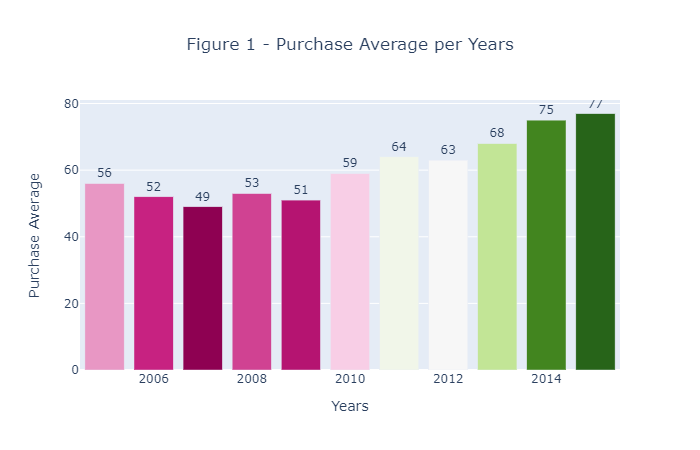

In [14]:
# Plotting Average purchase amount per year
value = x1['avg amount'].round(0)
label = x1.loc[:, 'year_of_purchase'].values
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'PiYG'})
layout = go.Layout(title="Figure 1 - Purchase Average per Years", 
                   xaxis={'title' : "Years"},
                  yaxis={'title' : "Purchase Average"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

In [15]:
# Total purchase amounts per year
x2 = sqldf("SELECT year_of_purchase, SUM(purchase_amount) AS 'sum_amount' FROM data GROUP BY 1 ORDER BY 1")
x2

,year_of_purchase,sum_amount
0,2005,82064.40
1,2006,114010.49
2,2007,230260.00
3,2008,229853.88
4,2009,256441.51
5,2010,290116.92
6,2011,303939.85
7,2012,374963.34
8,2013,401610.18
9,2014,432665.20


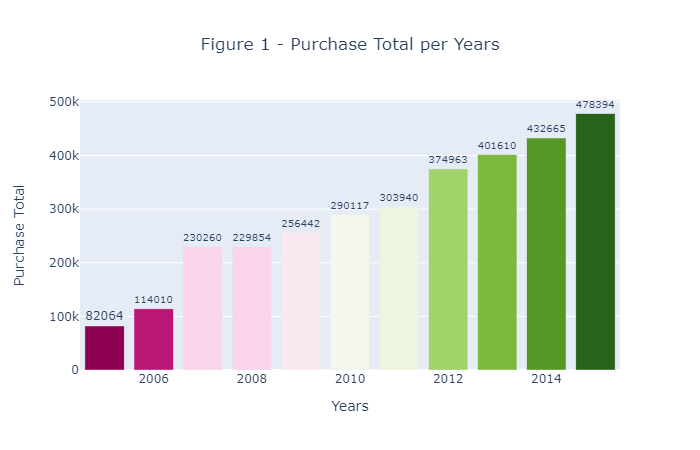

In [16]:
# Plotting Total purchase amounts per year
value = x2['sum_amount'].round(0)
label = x2.loc[:, 'year_of_purchase'].values
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'PiYG'})
layout = go.Layout(title="Figure 1 - Purchase Total per Years", 
                   xaxis={'title' : "Years"},
                  yaxis={'title' : "Purchase Total"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

In [17]:
# All in one
x3 = sqldf("SELECT year_of_purchase, COUNT(year_of_purchase) AS 'counter',AVG(purchase_amount) AS 'avg_amount',SUM(purchase_amount) AS 'sum_amount'FROM data GROUP BY 1 ORDER BY 1")
x3

,year_of_purchase,counter,avg_amount,sum_amount
0,2005,1470,55.826122,82064.40
1,2006,2182,52.250454,114010.49
2,2007,4674,49.264014,230260.00
3,2008,4331,53.071780,229853.88
4,2009,5053,50.750348,256441.51
5,2010,4939,58.740012,290116.92
6,2011,4785,63.519300,303939.85
7,2012,5960,62.913312,374963.34
8,2013,5912,67.931357,401610.18
9,2014,5739,75.390347,432665.20
